[(7, 7), (7, 6), (6, 6), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (0, 1), (0, 0)]
--- 2.9767215251922607 seconds ---


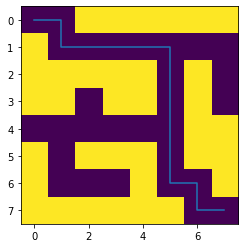

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

class Node():

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    open_list = []
    closed_list = []
    open_list.append(start_node)

    while len(open_list) > 0:

        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        open_list.pop(current_index)
        closed_list.append(current_node)

        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # Adjacent squares

            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            if maze[node_position[0]][node_position[1]] != 0:
                continue

            new_node = Node(current_node, node_position)

            children.append(new_node)

        for child in children:

            for closed_child in closed_list:
                if child == closed_child:
                    continue

            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h
            
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            open_list.append(child)


def main():

    control = [[0,0,0,0,0,0,0,0],
               [1,0,0,0,0,0,0,0],
               [1,0,0,0,0,0,0,0],
               [1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1],
               [1,0,0,0,0,0,0,1],
               [1,0,0,0,0,0,0,1],
               [1,1,1,1,0,0,0,0]]
    
    case = [[0,0,1,1,1,1,1,1],
            [1,0,0,0,0,0,0,0],
            [1,1,1,1,1,0,1,0],
            [1,1,0,1,1,0,1,0],
            [0,0,0,0,0,0,1,1],
            [1,0,1,1,1,0,1,1],
            [1,0,0,0,1,0,0,1],
            [1,1,1,1,1,1,0,0]]
    
    
    start = (7, 7)
    end = (0, 0)
    start_time = time.time()
    path = astar(case, start, end)
    print(path)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    plt.imshow(case)
    
    x, y = zip(*path)
    plt.plot(y, x)
    plt.imshow
    
if __name__ == '__main__':
    main()